In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("cm_GTR_G4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          1.7110 ( 1.3724,  2.3301) ( 1.3269,  2.2207)  0.8938 (Jnode 142)\n',
 't_n74          1.5194 ( 1.3155,  1.8074) ( 1.2919,  1.7632)  0.4713 (Jnode 141)\n',
 't_n75          0.9269 ( 0.8456,  1.0037) ( 0.8484,  1.0061)  0.1576 (Jnode 140)\n',
 't_n76          0.8631 ( 0.7908,  0.9298) ( 0.7926,  0.9313)  0.1387 (Jnode 139)\n',
 't_n77          0.7960 ( 0.7324,  0.8550) ( 0.7348,  0.8568)  0.1221 (Jnode 138)\n',
 't_n78          0.7856 ( 0.7231,  0.8436) ( 0.7252,  0.8452)  0.1200 (Jnode 137)\n',
 't_n79          0.7528 ( 0.6935,  0.8080) ( 0.6946,  0.8090)  0.1144 (Jnode 136)\n',
 't_n80          0.6916 ( 0.6363,  0.7434) ( 0.6372,  0.7441)  0.1070 (Jnode 135)\n',
 't_n81          0.6747 ( 0.6203,  0.7258) ( 0.6207,  0.7261)  0.1054 (Jnode 134)\n',
 't_n82          0.6238 ( 0.5716,  0.6733) ( 0.5727,  0.6743)  0.1016 (Jnode 133)\n',
 't_n83          0.5234 ( 0.4718,  0.5759) ( 0.4710,  0.5747)  0.1037 (Jnode 132)\n',
 't_n84          0.4218 ( 0.3680,  0.4776) ( 0.3671,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[1.711,
 1.5194,
 0.9269,
 0.8631,
 0.796,
 0.7856,
 0.7528,
 0.6916,
 0.6747,
 0.6238,
 0.5234,
 0.4218,
 0.2308,
 0.1247,
 0.0617,
 0.0319,
 0.015,
 0.183,
 0.1718,
 0.1197,
 0.4679,
 0.4042,
 0.3613,
 0.1008,
 0.3619,
 0.5049,
 0.7385,
 0.6991,
 0.4428,
 0.3277,
 0.1941,
 0.1399,
 0.0426,
 0.1453,
 0.1107,
 0.0941,
 0.0788,
 0.0608,
 0.0447,
 0.2421,
 0.2143,
 0.1178,
 0.0959,
 0.039,
 0.1898,
 0.1664,
 0.1822,
 0.5985,
 0.3961,
 0.7929,
 0.7702,
 0.761,
 0.572,
 0.1646,
 0.0832,
 0.4873,
 0.4107,
 0.7451,
 0.6185,
 0.5844,
 0.5176,
 0.1955,
 0.0853,
 0.6427,
 0.645,
 0.9102,
 0.7858,
 0.6887,
 0.7285,
 0.5682,
 0.4607]

In [7]:
lower_ci_iqtree

[1.3724,
 1.3155,
 0.8456,
 0.7908,
 0.7324,
 0.7231,
 0.6935,
 0.6363,
 0.6203,
 0.5716,
 0.4718,
 0.368,
 0.181,
 0.0938,
 0.0453,
 0.0232,
 0.0108,
 0.1418,
 0.1329,
 0.0915,
 0.4171,
 0.3565,
 0.3159,
 0.0793,
 0.3129,
 0.4696,
 0.6795,
 0.6429,
 0.3936,
 0.2898,
 0.1674,
 0.1187,
 0.0339,
 0.1237,
 0.0934,
 0.079,
 0.0658,
 0.0502,
 0.0366,
 0.2137,
 0.189,
 0.1042,
 0.0845,
 0.0332,
 0.1509,
 0.1316,
 0.1446,
 0.5368,
 0.3229,
 0.7314,
 0.7116,
 0.7035,
 0.5118,
 0.1263,
 0.0611,
 0.4252,
 0.3488,
 0.6892,
 0.5661,
 0.5319,
 0.4658,
 0.1609,
 0.0658,
 0.5951,
 0.5946,
 0.8307,
 0.6964,
 0.5891,
 0.6462,
 0.4435,
 0.3553]

In [8]:
upper_ci_iqtree

[2.3301,
 1.8074,
 1.0037,
 0.9298,
 0.855,
 0.8436,
 0.808,
 0.7434,
 0.7258,
 0.6733,
 0.5759,
 0.4776,
 0.282,
 0.1587,
 0.0806,
 0.0423,
 0.02,
 0.2261,
 0.2128,
 0.1512,
 0.5192,
 0.453,
 0.4092,
 0.1252,
 0.4134,
 0.5588,
 0.7928,
 0.7517,
 0.494,
 0.3694,
 0.2239,
 0.1638,
 0.0531,
 0.1694,
 0.1304,
 0.1115,
 0.094,
 0.0732,
 0.0543,
 0.2733,
 0.2418,
 0.1261,
 0.1018,
 0.0442,
 0.2412,
 0.2134,
 0.232,
 0.6527,
 0.4658,
 0.8488,
 0.8228,
 0.8123,
 0.6271,
 0.2071,
 0.1091,
 0.5452,
 0.4701,
 0.7945,
 0.6654,
 0.6312,
 0.5659,
 0.235,
 0.1086,
 0.6708,
 0.6982,
 0.9848,
 0.8526,
 0.7566,
 0.8061,
 0.7262,
 0.571]

In [9]:
file_LG = open("cm_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

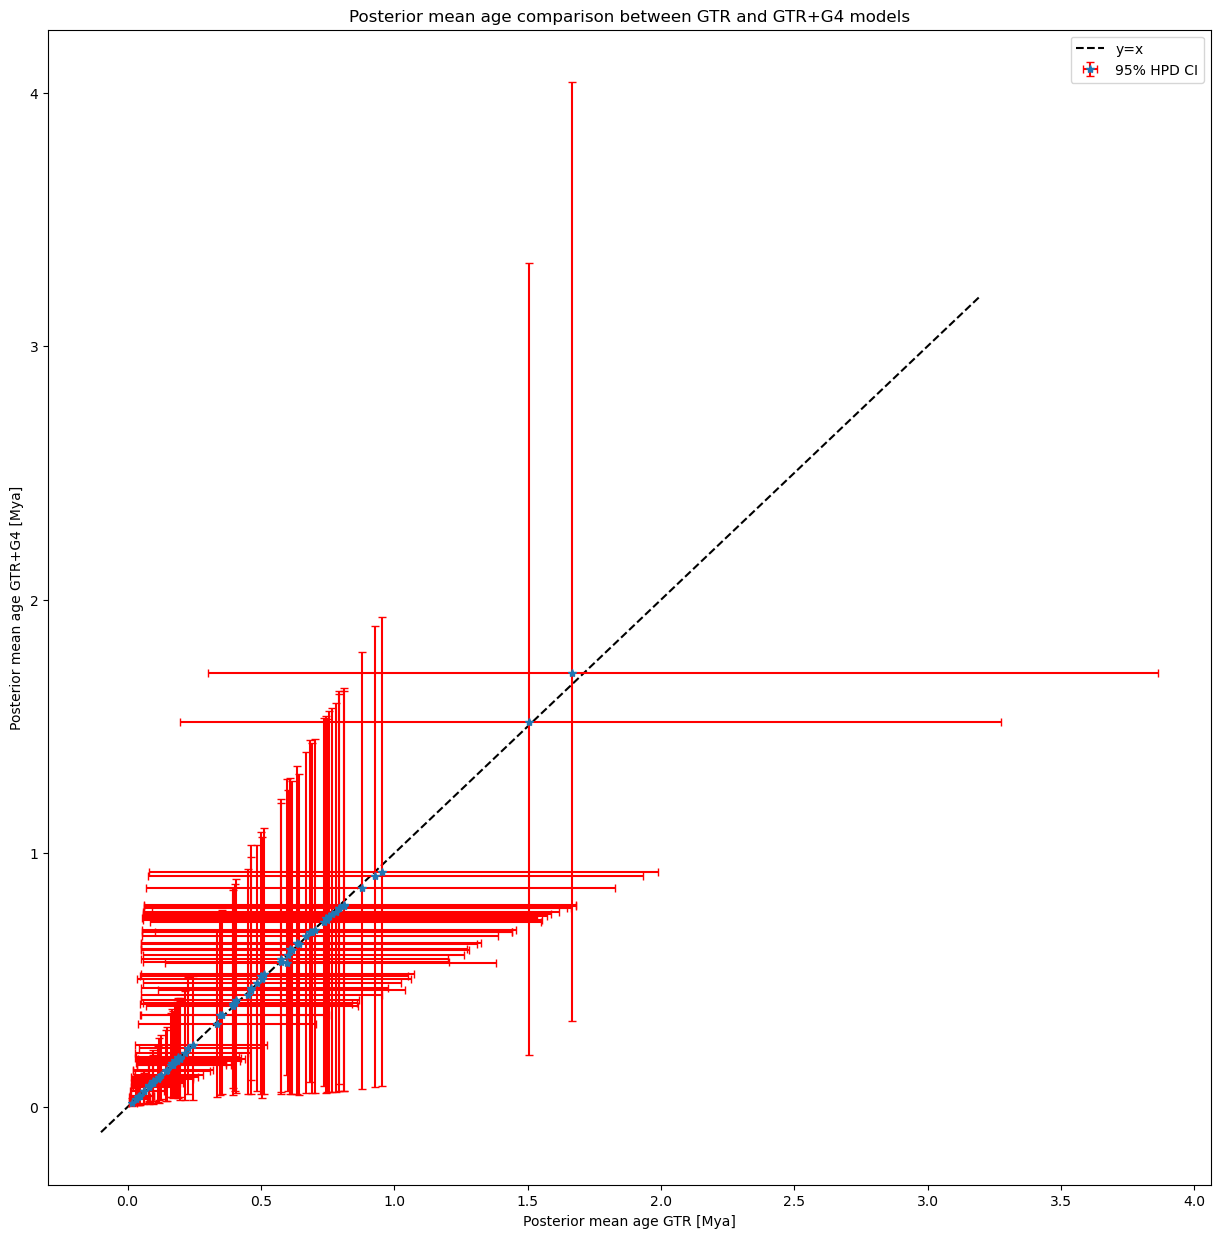

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_G4.png')

In [11]:
posterior_mean_baseml

[1.6653,
 1.506,
 0.9543,
 0.8799,
 0.8099,
 0.793,
 0.7565,
 0.6928,
 0.6682,
 0.6098,
 0.5096,
 0.4069,
 0.2278,
 0.125,
 0.062,
 0.0319,
 0.015,
 0.1788,
 0.1648,
 0.1165,
 0.4624,
 0.3951,
 0.3459,
 0.0945,
 0.3522,
 0.5034,
 0.7487,
 0.7013,
 0.453,
 0.3342,
 0.1981,
 0.1424,
 0.0433,
 0.1477,
 0.1121,
 0.095,
 0.0794,
 0.0613,
 0.0449,
 0.2461,
 0.2166,
 0.1186,
 0.096,
 0.0388,
 0.1954,
 0.1702,
 0.1858,
 0.6032,
 0.3966,
 0.8105,
 0.7817,
 0.7667,
 0.5758,
 0.1644,
 0.0819,
 0.4852,
 0.4021,
 0.7429,
 0.6172,
 0.5768,
 0.5018,
 0.1898,
 0.0815,
 0.641,
 0.6353,
 0.9276,
 0.7943,
 0.6828,
 0.7358,
 0.5992,
 0.463]

In [12]:
posterior_mean_iqtree

[1.711,
 1.5194,
 0.9269,
 0.8631,
 0.796,
 0.7856,
 0.7528,
 0.6916,
 0.6747,
 0.6238,
 0.5234,
 0.4218,
 0.2308,
 0.1247,
 0.0617,
 0.0319,
 0.015,
 0.183,
 0.1718,
 0.1197,
 0.4679,
 0.4042,
 0.3613,
 0.1008,
 0.3619,
 0.5049,
 0.7385,
 0.6991,
 0.4428,
 0.3277,
 0.1941,
 0.1399,
 0.0426,
 0.1453,
 0.1107,
 0.0941,
 0.0788,
 0.0608,
 0.0447,
 0.2421,
 0.2143,
 0.1178,
 0.0959,
 0.039,
 0.1898,
 0.1664,
 0.1822,
 0.5985,
 0.3961,
 0.7929,
 0.7702,
 0.761,
 0.572,
 0.1646,
 0.0832,
 0.4873,
 0.4107,
 0.7451,
 0.6185,
 0.5844,
 0.5176,
 0.1955,
 0.0853,
 0.6427,
 0.645,
 0.9102,
 0.7858,
 0.6887,
 0.7285,
 0.5682,
 0.4607]

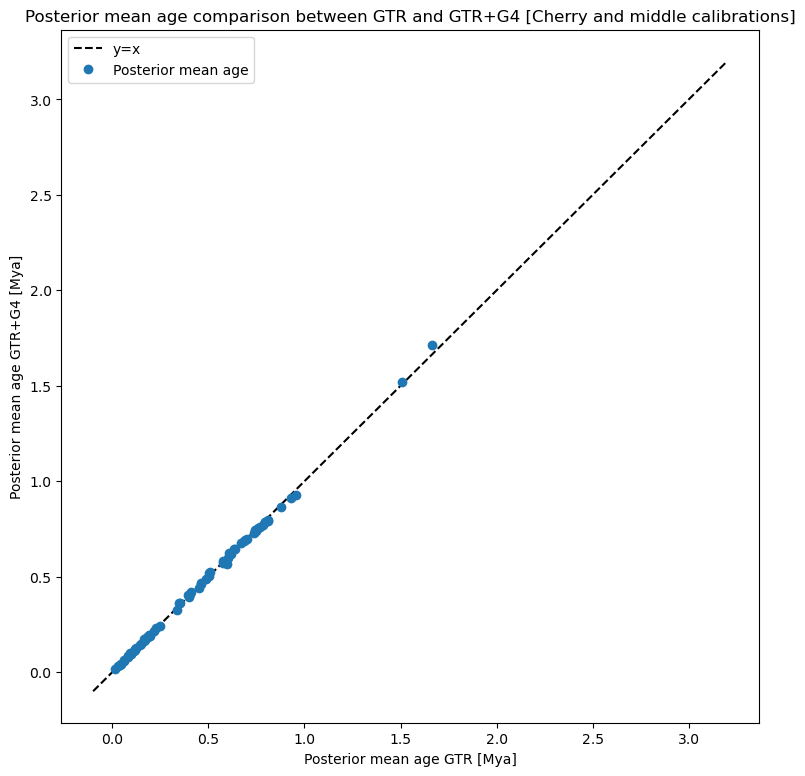

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_G4_scatter.png')

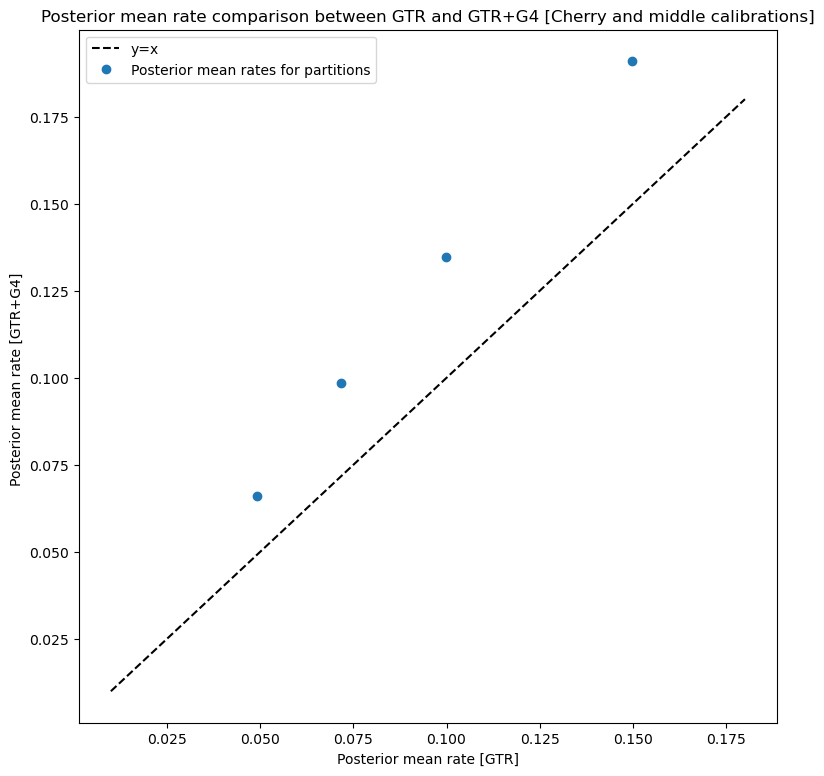

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+G4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+G4 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_rate_comparison_GTR_G4_all_scatter.png')